### Necessary Imports

In [1]:
# Import numpy and matplotlib
#20I0565 E Faizan Pervaz
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading Data

In [2]:
# Read the dataset
data = pd.read_csv('price-prediction.csv')


### Visualize Datapoints in Data

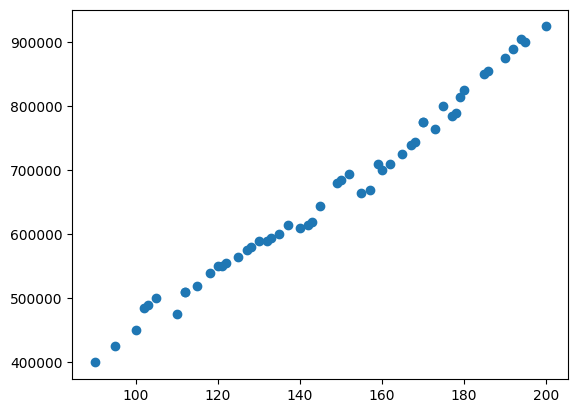

In [3]:
# Plot the dataset
plt.scatter(data['PLOTS'], data['PRICE'])

### Some Base Functions

In [4]:
def plot_data(m, b, data):
     
     plt.scatter(data['PLOTS'], data['PRICE'])
    
    # Find min and max values in the data
     x_min = np.min(data['PLOTS'])
     x_max = np.max(data['PLOTS'])
     
     # Plot the line defined by y = m * x + b
     plt.plot([x_min, x_max], [m * x_min + b, m * x_max + b], 'r')
     
     # Set the labels for the x and y axes
     plt.xlabel('PLOTS')
     plt.ylabel('PRICE')
     
     # Set the title for the plot
     plt.title('Price vs PLOTS')
     
     # Display the plot
     plt.show()

In [5]:
def loss_function(m, c, points):
    # Initialize the total error to 0
    total_error = 0
    
    # Loop through all the points in the dataset
    for i in points:
        # Get the 'x' and 'y' values of the current 'point'
        x, y = i
        
        # Calculate the error for this point and add it to the total error
        total_error += (y - (m * x + c)) ** 2
        #e = 1\n (y-y)^2

    total_error = total_error / len(points)
    # Return the average error for all points
    return total_error
    

In [6]:
# Formula of slope: -1/N * x * (y - (m * x + b))
# Formula of y_intercept: -1/N * (y - (m * x + b))

def gradient_descent(current_m, current_b, points, lr):
    # Initialize the gradients for m and b to 0
    m_gradient = 0
    b_gradient = 0
    
    # Get the number of points in the dataset
    N = float(len(points))
    
    # Loop through all the points in the dataset
    for x,y in points:
        # Get the 'x' and 'y' values of the current 'point'
        # Calculate the partial derivatives of the loss function with respect to m and b
        m_gradient += -(1/N) * x * (y - (current_m * x + current_b))
        b_gradient += -(1/N) * (y - (current_m * x + current_b))
    
    # Update 'm' and 'b' using gradient descent
    m_new = current_m - lr * m_gradient
    b_new = current_b - lr * b_gradient
    
    # Return the updated values of m and b
    return m_new, b_new

### Running Script

In [8]:
m, b = 0, 0

# Set the learning rate and number of epochs for gradient descent
lr = 0.000001
num_epochs = 1000

# Get the data
points = np.array(data)

# Perform gradient descent for the specified number of epochs
for i in range(num_epochs):
    # Update m and b using gradient descent
    m, b = gradient_descent(m, b, points, lr)

    if i % 100 == 0:    #checking for every 100th epoch
        plot_data(m, b, data)
        print("Epoch:", i, "Loss function:", loss_function(m, b, points))

# Print the final values of m and b
print("m = {}, b = {}".format(m, b))



TypeError: plot_data() got an unexpected keyword argument 'size'

### Predicting New Data

In [ ]:
# Read a datapoint as 'x' from the user
x = float(input("Enter a size of plot: "))

# Calculate the prediction using the updated values of 'm' and 'b'
prediction = m * x + b

# Print the prediction
print(f"Price for {x} size of plot should be around ${int(prediction)}")

<hr>